## F1 state representation quality using multiple states  
Plot the state quality as a function of dimension K.

In [1]:
from bbvi_infer_2l import * 
from f1 import *
%matplotlib inline
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read in saved performance metrics

In [2]:
## Our model
gsd1 = np.load('./saved2022/f1GSD.npy')
gsd2 = np.load('./saved2022/f1GSD2.npy')

In [3]:
gsd = np.vstack((gsd1, gsd2))
print(gsd)  # (5, 17)

[[0.39696312 0.36969321 0.47737837 0.55113108 0.44941122 0.63534242
  0.66788038 0.64859002 0.36171367 0.6935234  0.48047722 0.62209482
  0.56685776 0.66454912 0.5037961  0.74372482 0.76038116]
 [0.36233344 0.43554385 0.45382708 0.63472265 0.52022002 0.63038426
  0.69158661 0.58235203 0.45948249 0.56786489 0.8013635  0.61093895
  0.67911373 0.62480632 0.50247908 0.68577626 0.65765417]
 [0.43546638 0.61550976 0.46521537 0.42128912 0.61860861 0.59598698
  0.62387667 0.46591261 0.62240471 0.66826774 0.49666873 0.60869228
  0.61450263 0.73481562 0.58599318 0.72861791 0.65695693]
 [0.33823985 0.52370623 0.49209792 0.58785249 0.67004958 0.42771924
  0.42694453 0.64564611 0.7173071  0.66718314 0.52626278 0.63177874
  0.56639293 0.42764177 0.61124884 0.68686086 0.57716145]
 [0.30531453 0.4291912  0.42516269 0.45723582 0.34575457 0.69499535
  0.34079641 0.49542919 0.65013945 0.64642082 0.73039975 0.54268671
  0.71219399 0.48644252 0.42121165 0.56995662 0.57646421]]


In [4]:
slds1 = np.load('./saved2022/f1SLDS.npy')
slds2 = np.load('./saved2022/f1SLDS2.npy')

In [5]:
slds = np.vstack((slds1, slds2))
print(slds)  # (4, 17)

[[0.12418655 0.09436009 0.18887512 0.17942361 0.21846917 0.34304307
  0.17771924 0.32127363 0.32948559 0.23698482 0.37898977 0.43980477
  0.41183762 0.44561512 0.48334366 0.41338705 0.4508057 ]
 [0.17260614 0.17895879 0.24387976 0.21444066 0.194608   0.17128912
  0.26510691 0.23055469 0.28370003 0.2356678  0.48280136 0.27091726
  0.38046173 0.29934924 0.5464828  0.44042454 0.47869538]
 [0.06523086 0.14332197 0.17206384 0.21939882 0.21033468 0.26069104
  0.21358847 0.41439417 0.39990703 0.31437868 0.35365665 0.26301518
  0.4845832  0.48613263 0.43290982 0.44669972 0.44793926]
 [0.12418655 0.09436009 0.18887512 0.17942361 0.21846917 0.34304307
  0.17771924 0.32127363 0.32948559 0.23698482 0.37898977 0.43980477
  0.41183762 0.44561512 0.48334366 0.41338705 0.4508057 ]]


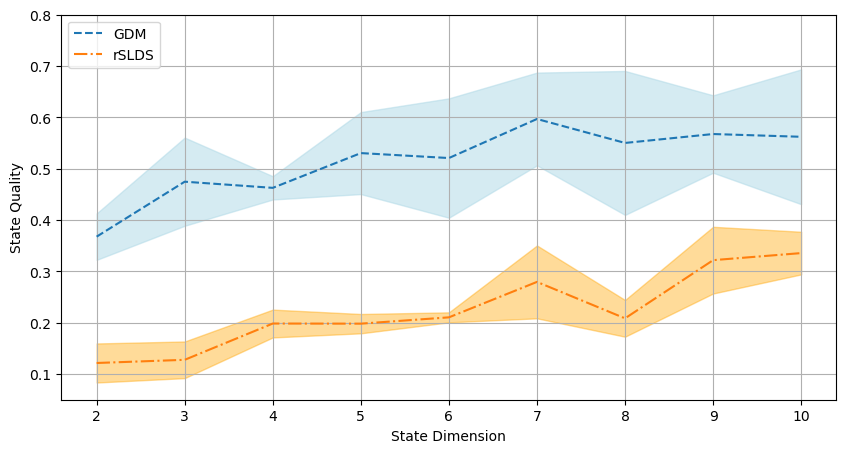

In [ ]:
plt.figure(figsize=(10, 5))
mean_gsd = np.mean(gsd, axis=0)[0:9]
std_gsd = np.std(gsd, axis=0)[0:9]
mean_slds = np.mean(slds, axis=0)[0:9]
std_slds = np.std(slds, axis=0)[0:9]
steps = range(2,11)

plt.plot(steps, mean_gsd, linestyle="--", label="GDM")
plt.plot(steps, mean_slds, linestyle="-.", label="rSLDS")
plt.fill_between(
    steps, mean_gsd - std_gsd, mean_gsd + std_gsd,
    color="lightblue", alpha=0.5)
plt.fill_between(
    steps, mean_slds - std_slds, mean_slds + std_slds,
    color="orange", alpha=0.4)
plt.xlabel("State Dimension")
plt.ylabel("State Quality")
plt.ylim([0.05,0.8])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()